## Analysis and visualization of BFE of the Symphony halos

- [ ] analysis to Visualize wakes in 3D as a function of time 
- [ ] Visualize dipole
- [ ] Visualize quadrupole 
- [ ] Show how to remove terms of the expansion! 
- [ ] Contributions to the density and potential from each coefficient

In [1]:
%pylab inline
import pyEXP 
import EXPtools
import k3d

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:

coefs = pyEXP.coefs.Coefs.factory('../../data/Halo170/Halo170/coeffs_Halo170_224.h5')

In [3]:
config = """
---
    id: sphereSL
    parameters:
      numr: 1000
      rmin: 0.25
      rmax: 150
      Lmax: 5
      nmax: 10
      scale: 25
      modelname: ../../data/Halo170/Halo170/dens_table_model_Halo170_224.txt
      cachename: ../../data/Halo170/.slgrid_sph_cache_model_Halo170_224
...
"""

In [4]:
basis = pyEXP.basis.Basis.factory(config)

---- SLGridSph::ReadH5Cache: successfully read basis cache <../../data/Halo170/.slgrid_sph_cache_model_Halo170_224>
SphericalSL::orthoTest: worst=0.0364622


In [5]:
halo_basis = basis.getBasis()

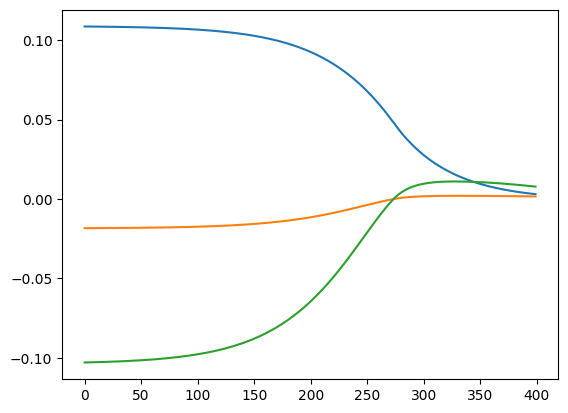

In [6]:
plt.plot(halo_basis[0][0]['density'])
plt.plot(halo_basis[1][0]['density'])
plt.plot(halo_basis[1][1]['density'])

In [7]:
def combine_coefs(file_add, snaps=range(251,601)):
    coefs_new = pyEXP.coefs.Coefs.factory(file_add + "{:03d}.h5".format(snaps[0]))
    for nsnap in snaps:
        coef = pyEXP.coefs.Coefs.factory(file_add + "{:03d}.h5".format(nsnap))
        coefs_new.add(coef.getCoefStruct(nsnap))
    return coefs_new

In [ ]:
H170_coefs = combine_coefs('../../data/Halo170/Halo170/coeffs_Halo170_', snaps=range(215, 217))

In [ ]:
H170_coefs

In [7]:
# 

coefs = pyEXP.coefs.Coefs.factory('../../data/Halo170/Halo170/coeffs_Halo170_')

print("Got coefs for name=", coefs.getName())

Got coefs for name= dark halo


In [ ]:
nmax = np.arange(0, 10, 1)

In [12]:
coefs_rm = EXPtools.utils.coefficients.remove_terms(coefs, [0, ],[0],[0])

0 0 0 0


In [14]:
coefs_rm.getAllCoefs()

array([[[ 0.00000000e+00+0.00000000e+00j],
        [-9.77522418e-03+0.00000000e+00j],
        [ 2.27371184e-03+0.00000000e+00j],
        [-4.14604469e-04+0.00000000e+00j],
        [ 9.71278892e-04+0.00000000e+00j],
        [-3.05304605e-04+0.00000000e+00j],
        [ 4.34105774e-04+0.00000000e+00j],
        [-8.84920674e-05+0.00000000e+00j],
        [ 4.03079041e-05+0.00000000e+00j],
        [ 8.32783763e-06+0.00000000e+00j]],

       [[-1.02946684e-04+0.00000000e+00j],
        [-5.13911036e-04+0.00000000e+00j],
        [ 4.38736697e-04+0.00000000e+00j],
        [-2.42504522e-04+0.00000000e+00j],
        [ 5.25138845e-05+0.00000000e+00j],
        [-2.73412555e-05+0.00000000e+00j],
        [ 3.01513138e-05+0.00000000e+00j],
        [-1.43055276e-05+0.00000000e+00j],
        [ 3.45419924e-05+0.00000000e+00j],
        [-3.47716929e-05+0.00000000e+00j]],

       [[-2.01635749e-04+3.19521586e-04j],
        [-1.69503625e-04-4.71243464e-04j],
        [ 2.36769400e-05+1.56325671e-04j],
       

In [9]:
np.zeros((10,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [188]:
coeft = basis.createFromArray(np.ones(10), np.zeros((10,3)), time=3.0)

RuntimeError: Basis::createCoefficients: basis <SphericalSL> not recognized


In [172]:
pyEXP.coefs.Coefs.makecoefs

In [177]:
all_coefs = pyEXP.coefs.Coefs

TypeError: makecoefs(): incompatible function arguments. The following argument types are supported:
    1. (coef: pyEXP.coefs.CoefStruct, name: str = '') -> pyEXP.coefs.Coefs

Invoked with: 

In [179]:
coefs2 = coefs.deepcopy()

In [183]:
coefs2.add(coefs.getCoefStruct())

TypeError: getCoefStruct(): incompatible function arguments. The following argument types are supported:
    1. (self: pyEXP.coefs.Coefs, time: float) -> pyEXP.coefs.CoefStruct

Invoked with: <pyEXP.coefs.SphCoefs object at 0x7f3abb2a3770>

In [164]:
dens0_XY, dens_XY, grid_XY  = EXPtools.visuals.slice_fields(basis, coefs, time=0.0, 
                                                                    projection='XY')
dens0_YZ, dens_YZ, grid_YZ  = EXPtools.visuals.slice_fields(basis, coefs, time=0.0, projection='YZ')
dens0_XZ, dens_XZ, grid_XZ  = EXPtools.visuals.slice_fields(basis, coefs, time=0.0, projection='XZ')


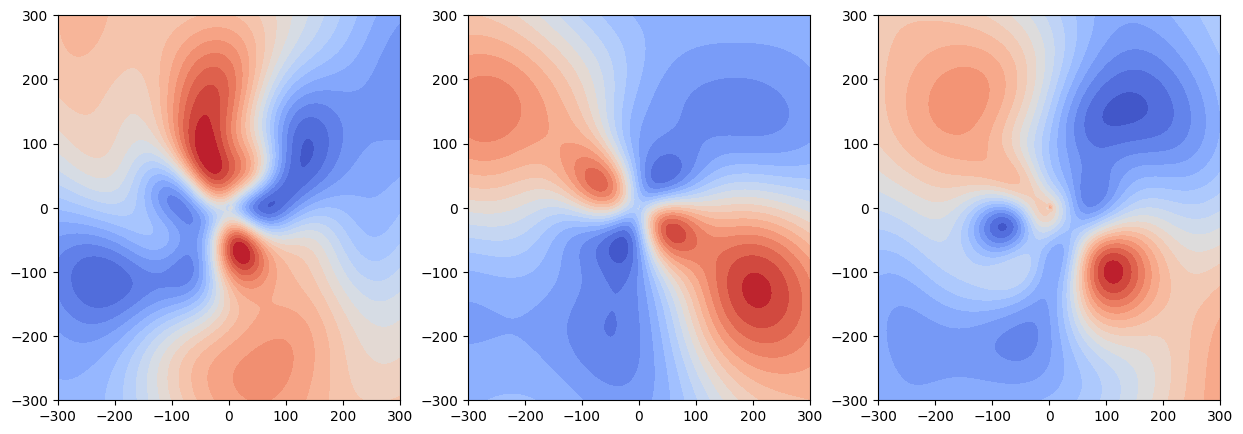

In [165]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].contourf(grid_XY[0], grid_XY[1], (dens_XY/dens0_XY), cmap='coolwarm', levels=20)
ax[1].contourf(grid_YZ[0], grid_YZ[1], (dens_YZ/dens0_YZ), cmap='coolwarm', levels=20)
ax[2].contourf(grid_XZ[0], grid_XZ[1], (dens_XZ/dens0_XZ), cmap='coolwarm', levels=20)

In [166]:
dens3D, dens03D, grid3D = EXPtools.visuals.slice_3d_fields(basis, coefs, time=0, prop='dens', npoints=40)

In [167]:
rend3D = EXPtools.visuals.field3Drender(np.array([(dens3D/dens03D) - 1]), 
                                        contour_ranges=[[-0.9, 0.9],[-0.2, 0.2]], 
                                        size=[200, 200, 200], contour_alphas=[2, 1])

In [168]:
rend3D

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, axes_helper_colors=[16711680, 65280, 255], background…

In [40]:
times = coefs.Times()
data  = coefs.getAllCoefs()


In [41]:
np.shape(data)

(21, 10, 1)

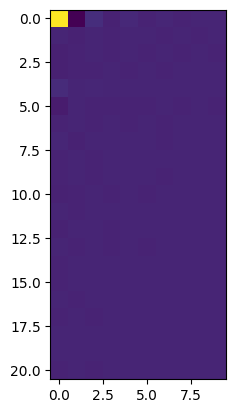

In [42]:
imshow(data[:,:,0].real)